# Random forests - regression

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


### Visualize data

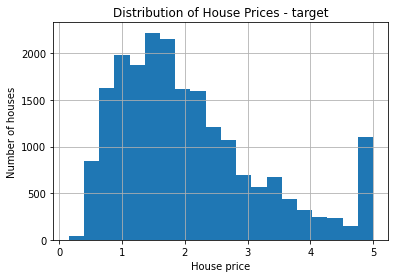

In [3]:
# Display the target distribution

y.hist(bins=20)
plt.xlabel("House price")
plt.ylabel("Number of houses")
plt.title("Distribution of House Prices - target")
plt.show()

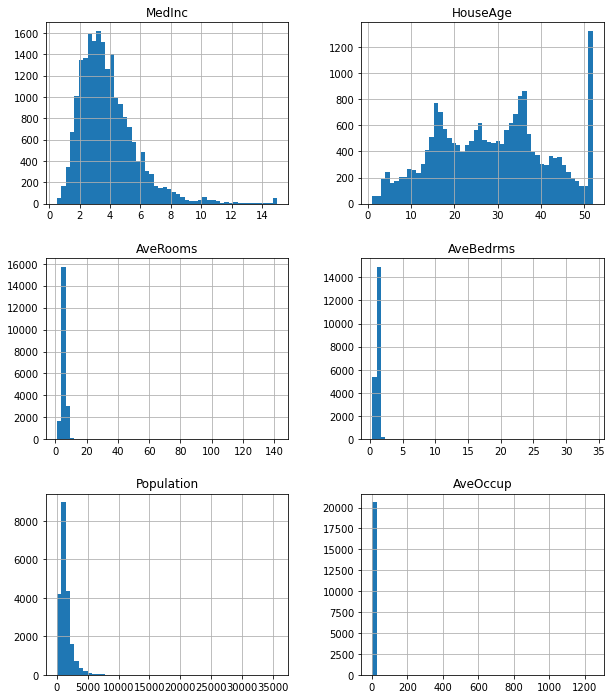

In [4]:
# Display the variables distribution

X.hist(bins=50, figsize=(10, 12))
plt.show()

### Split data

In [5]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

## Random Forest

In [6]:
# fit model

rf = RandomForestRegressor(
    criterion="squared_error",
    n_estimators=3,
    max_depth=3,
    random_state=3,
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=3, random_state=3)

In [7]:
# R2 in train set

rf.score(X_train, y_train)

0.5514732637642534

In [8]:
# R2 in test set

rf.score(X_test, y_test)

0.5233560518987435

The model explains more than 50% of the variability in the target variable.

It's better than the decision tree that we trained in the previous section.

## Plot trees in the forest

This is how the tree makes the decisions.

In [9]:
# Here we have each of the trees in the forests

rf.estimators_

[DecisionTreeRegressor(max_depth=3, max_features=1.0, random_state=218175338),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, random_state=303761048),
 DecisionTreeRegressor(max_depth=3, max_features=1.0, random_state=893988089)]

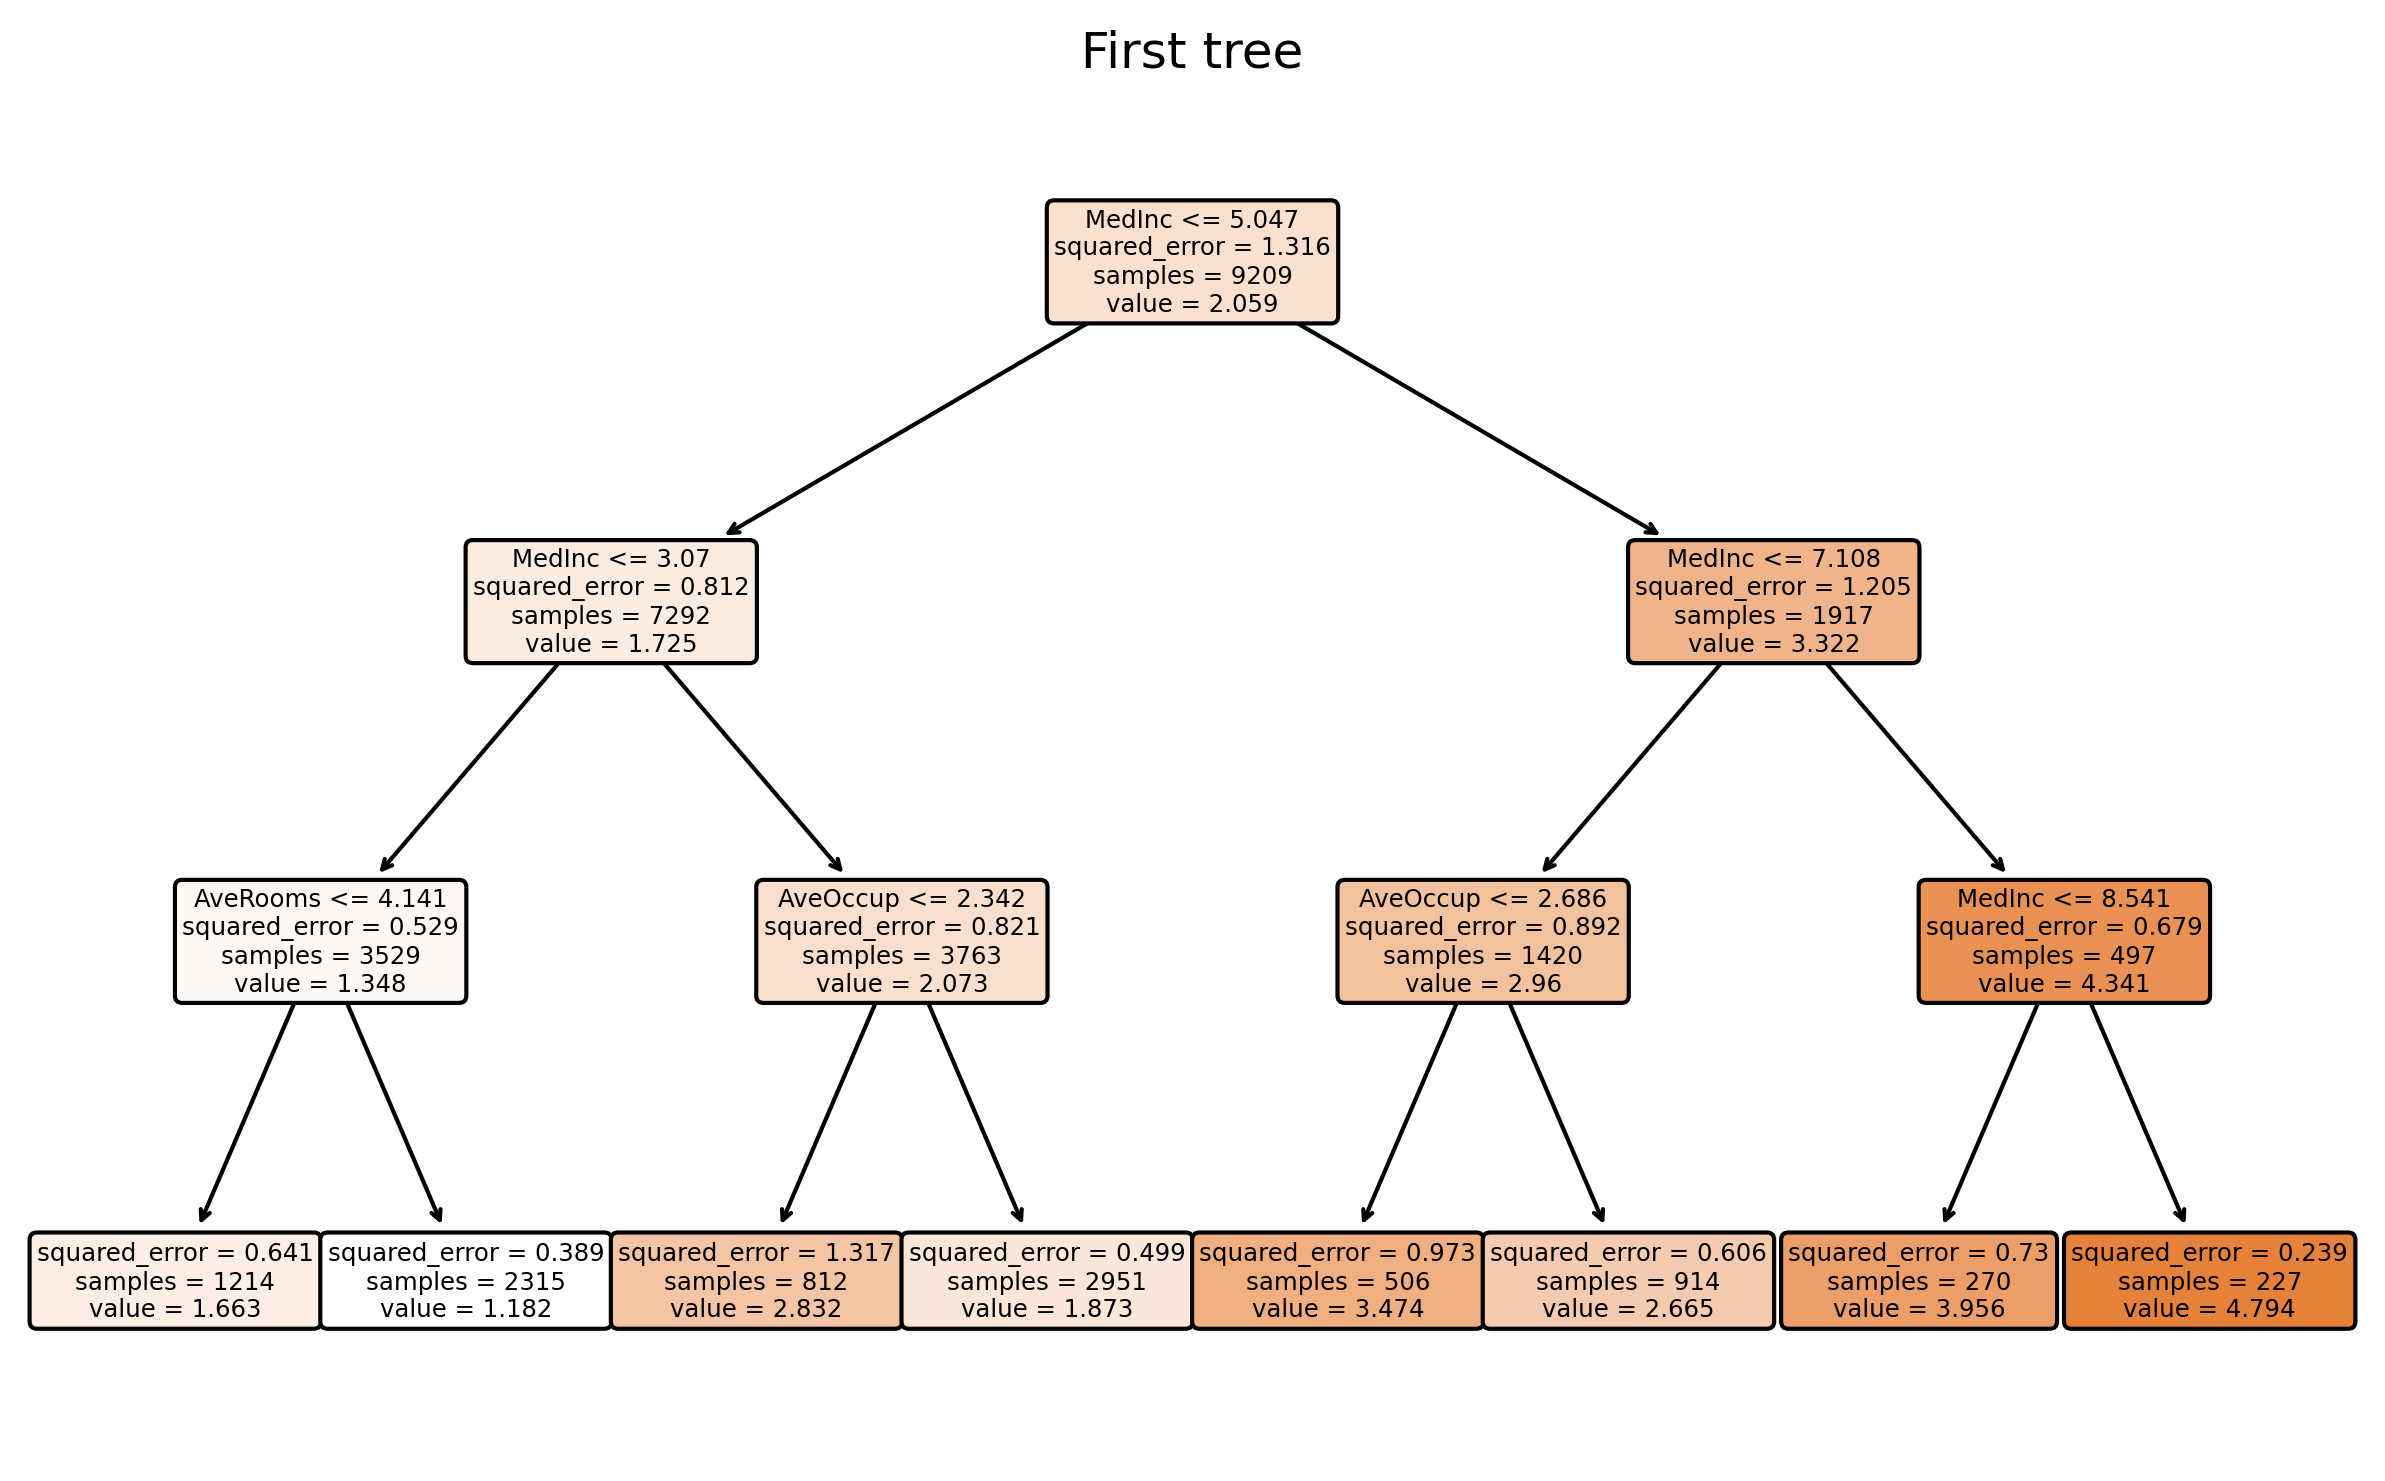

In [10]:
plt.figure(figsize=(10, 6), dpi=300)

plot_tree(
    decision_tree=rf.estimators_[0],
    feature_names=X_train.columns.to_list(),
    filled=True,  # color the squares
    rounded=True  # round squares
)
plt.title("First tree")
plt.show()

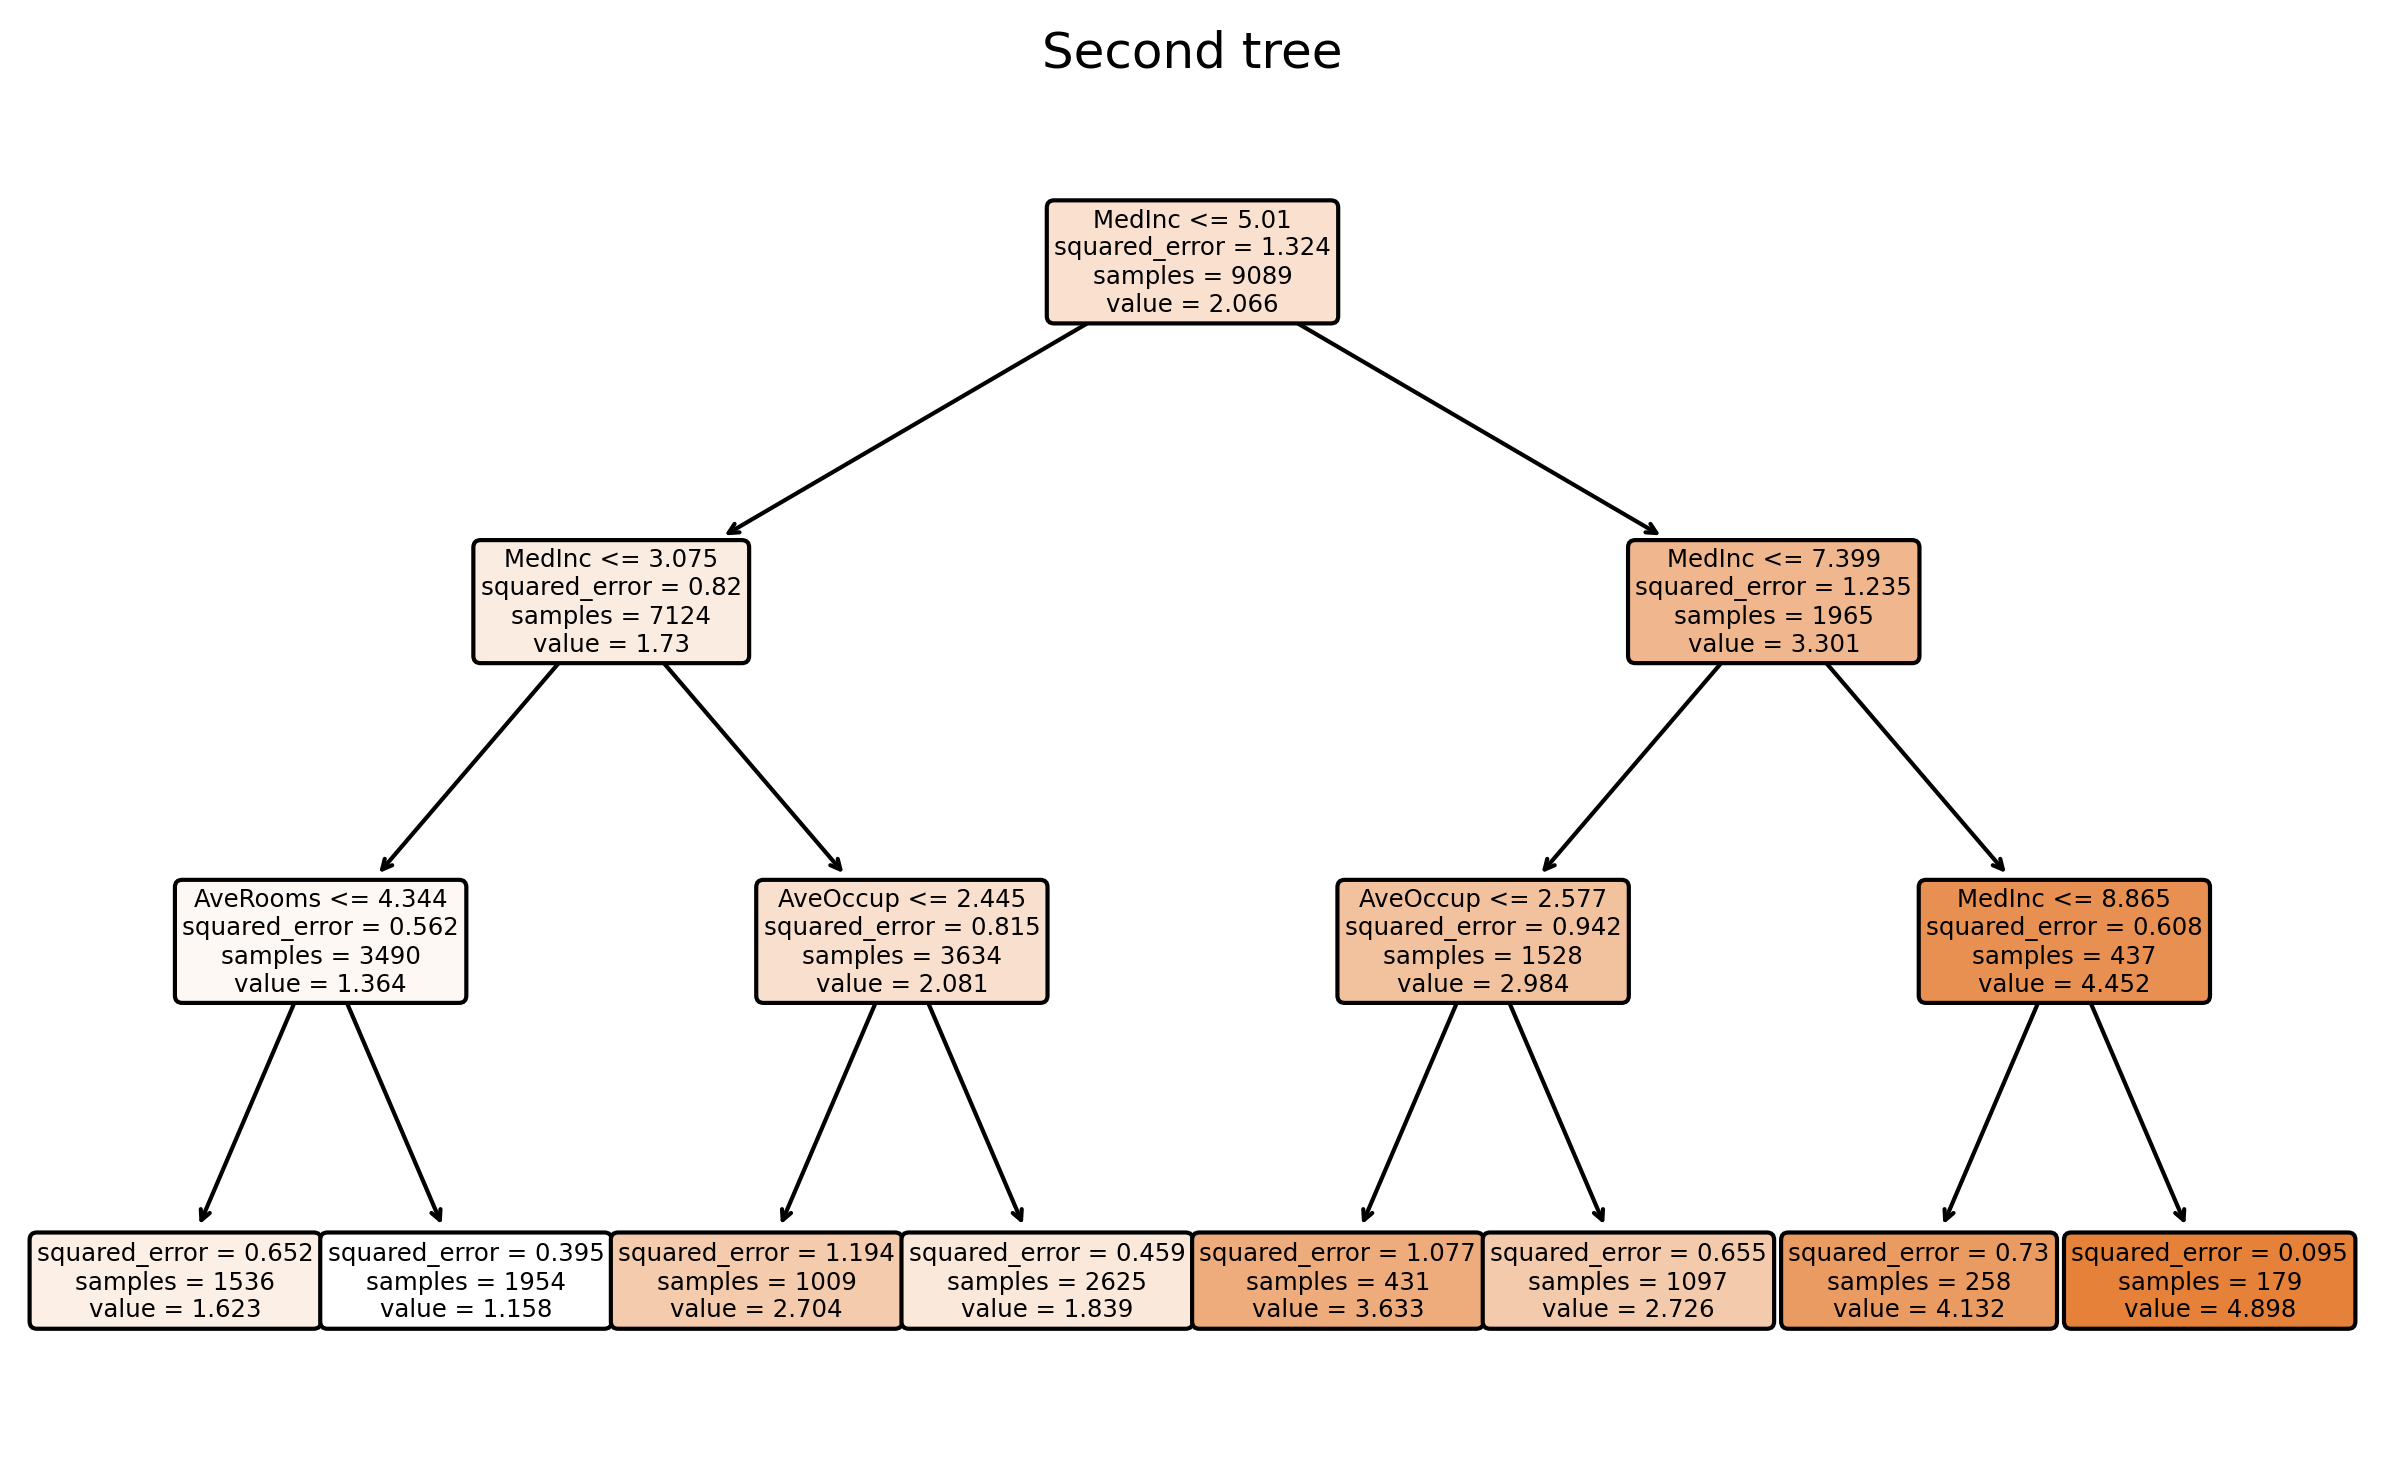

In [11]:
plt.figure(figsize=(10, 6), dpi=300)

plot_tree(
    decision_tree=rf.estimators_[1],
    feature_names=X_train.columns.to_list(),
    filled=True,  # color the squares
    rounded=True  # round squares
)
plt.title("Second tree")
plt.show()

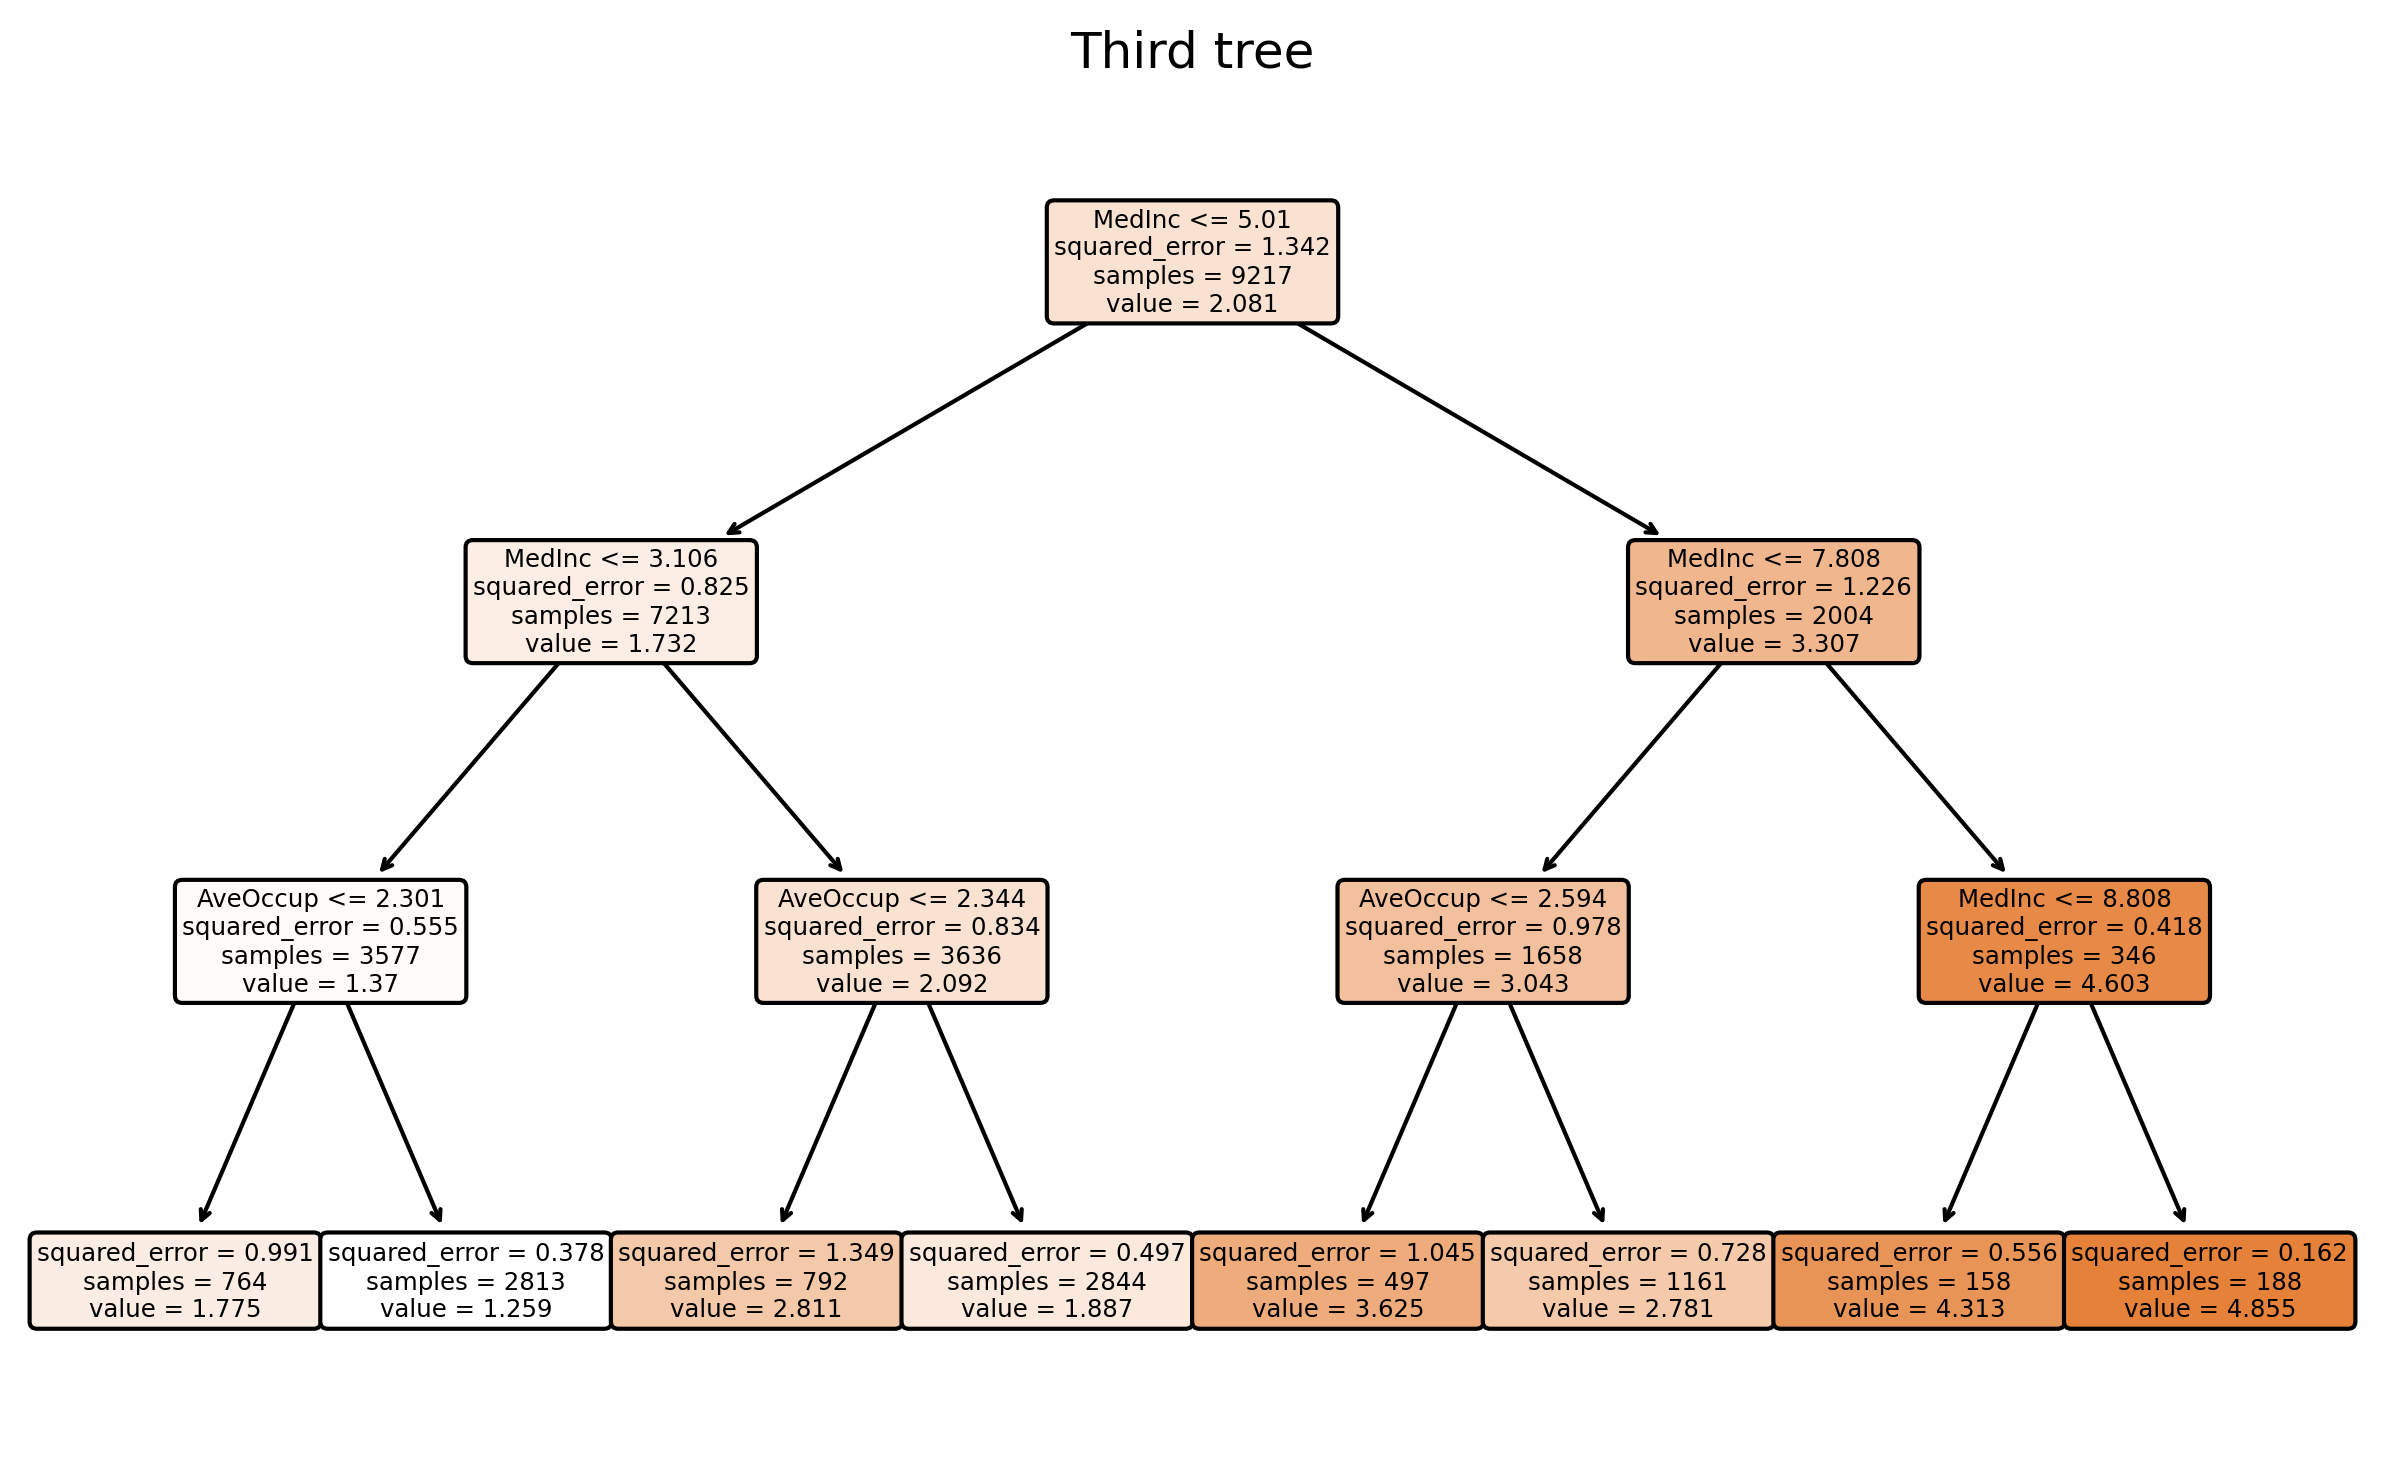

In [12]:
plt.figure(figsize=(10, 6), dpi=300)

plot_tree(
    decision_tree=rf.estimators_[2],
    feature_names=X_train.columns.to_list(),
    filled=True,  # color the squares
    rounded=True  # round squares
)
plt.title("Third tree")
plt.show()

## Global explanations - feature importance

The importance in random forests is the average of the importance returned by each tree in the forest.

In [13]:
# importance based on each tree

# Let's take the importance derived by each single decisiont tree

global_exp = pd.concat([
    pd.Series(rf.estimators_[0].feature_importances_),
    pd.Series(rf.estimators_[1].feature_importances_),
    pd.Series(rf.estimators_[2].feature_importances_),
], axis=1,
)

global_exp.columns = ["tree_1", "tree_2", "tree_3"]
global_exp.index = rf.feature_names_in_

global_exp["importance"] = global_exp.mean(axis=1)

global_exp

,tree_1,tree_2,tree_3,importance
MedInc,0.852944,0.846556,0.855069,0.851523
HouseAge,0.000000,0.000000,0.000000,0.000000
AveRooms,0.027645,0.028942,0.000000,0.018862
AveBedrms,0.000000,0.000000,0.000000,0.000000
Population,0.000000,0.000000,0.000000,0.000000
AveOccup,0.119411,0.124502,0.144931,0.129615


In [14]:
# random forest importance

global_exp = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)

global_exp

MedInc        0.851523
HouseAge      0.000000
AveRooms      0.018862
AveBedrms     0.000000
Population    0.000000
AveOccup      0.129615
dtype: float64

The importance in random forests is the the average importance considering all trees.

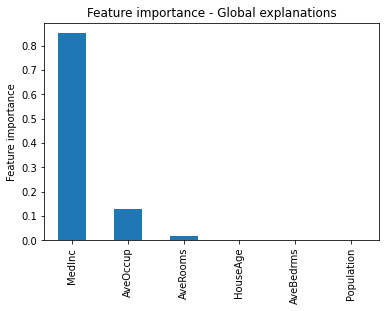

In [15]:
global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

We can see how much of the price variability can be explained by each one of the features according to this random forest.

Multicolinearity will affect the feature importance returned by the tree.